# Préparation des donnée
    - un jeu de données avec les voies actuelles : data_voies_lyon_actu.csv
    - un jeu de données avec les voies historique : data_voies_lyon_hist.csv
    - un jeu de données avec les voies suprimer : data_voies_lyon_sup.csv
    
    - un jeu de données ou on aligne les voies historiques avec les voies actuelles :
    - un jeu de données sur les thématiques normalisée :
    - un jeu de données avec les personnes / les autres : 

In [41]:
# Importing the libraries | Importation des librairies 
import pandas as pd
import numpy as np
import regex as r

In [42]:
# Importing the data | Importation des données
data_voies_lyon = pd.read_table("/workspaces/Lyon_urban_space/data_archives_municipales_lyon/voieslyon_v01.csv",sep=";",header=0)

# Jeu de données avec les voies actuelles :

In [3]:
# Inspect Element | Inspecter l'élément
# data_voies_lyon

In [43]:
# Create a new data set with the actual in places | Créer un nouveau jeux de données avec les voies de lyon actuelles
data_voies_lyon_actu = data_voies_lyon[data_voies_lyon['Validité'] == 'Actuelle']
print(len(data_voies_lyon_actu))
print(len(data_voies_lyon))

# Filtering the dataset to include only current streets in Lyon
data_voies_lyon_actu = data_voies_lyon[data_voies_lyon['Validité'] == 'Actuelle']

# FR
#Affichage du nombre de voies actuelles à Lyon
print(f"Nombre de voies actuelles à Lyon : {len(data_voies_lyon_actu)}")
# Affichage du nombre total de voies répertoriées dans le jeu de données original pour comparaison
print(f"Nombre total de voies répertoriées : {len(data_voies_lyon)}")


2155
4423
Nombre de voies actuelles à Lyon : 2155
Nombre total de voies répertoriées : 4423


In [5]:
data_voies_lyon_actu.to_csv('data_voies_lyon_actu.csv', index=False)

# Jeu de données avec les voies historique :

In [13]:
# Create a new data set with the historical places | Créer un nouveau jeux de données avec les voies de lyon historique
data_voies_lyon_hist = data_voies_lyon[data_voies_lyon['Validité'] == 'Historique']
print(len(data_voies_lyon_hist))
print(len(data_voies_lyon))

# Filtering the dataset to include only current streets in Lyon
data_voies_lyon_hist = data_voies_lyon[data_voies_lyon['Validité'] == 'Historique']

# FR
#Affichage du nombre de voies actuelles à Lyon
print(f"Nombre de voies historique à Lyon : {len(data_voies_lyon_hist)}")
# Affichage du nombre total de voies répertoriées dans le jeu de données original pour comparaison
print(f"Nombre total de voies répertoriées : {len(data_voies_lyon)}")

1671
4423
Nombre de voies historique à Lyon : 1671
Nombre total de voies répertoriées : 4423


In [7]:
#data_voies_lyon_hist

In [8]:
data_voies_lyon_hist.to_csv('data_voies_lyon_hist.csv', index=False)

# Jeu de données avec les voies supprimer :

In [9]:
# Create a new data set with the historical places | Créer un nouveau jeux de données avec les voies de lyon historique
data_voies_lyon_sup = data_voies_lyon[data_voies_lyon['Validité'] == 'Supprimée']
print(len(data_voies_lyon_sup))
print(len(data_voies_lyon))

# FR
#Affichage du nombre de voies actuelles à Lyon
print(f"Nombre de voies supprimée à Lyon : {len(data_voies_lyon_sup)}")
# Affichage du nombre total de voies répertoriées dans le jeu de données original pour comparaison
print(f"Nombre total de voies répertoriées : {len(data_voies_lyon)}")

552
4423
Nombre de voies supprimée à Lyon : 552
Nombre total de voies répertoriées : 4423


In [10]:
data_voies_lyon_sup.to_csv('data_voies_lyon_sup.csv', index=False)

# Conclusion des 3 nouveaux jeux de données 
    - data_voies_lyon_actu.csv
    - data_voies_lyon_hist.csv
    - data_voies_lyon_sup.csv

In [11]:
int_sup = (len(data_voies_lyon_sup))
int_hist = (len(data_voies_lyon_hist))
int_actu = (len(data_voies_lyon_actu))
int_all = (len(data_voies_lyon))

print(len(data_voies_lyon_sup))
print(len(data_voies_lyon_hist))
print(len(data_voies_lyon_actu))
print(len(data_voies_lyon))

552
1671
2155
4423


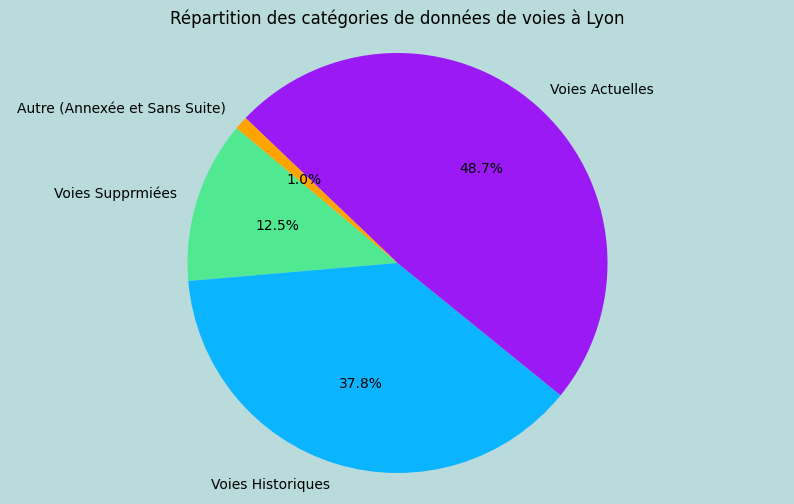

In [12]:
import matplotlib.pyplot as plt

# Calculating the count for "autre" category
int_autre = int_all - (int_actu + int_hist + int_sup)

# Labels for the sections
labels = ['Voies Supprmiées', 'Voies Historiques', 'Voies Actuelles', 'Autre (Annexée et Sans Suite)']

# Values for each section
sizes = [int_sup, int_hist, int_actu, int_autre]

# Setting color for each section
colors =  ["#50e991", "#0bb4ff", "#9b19f5", "#ffa300"]
#colors = ['#5D8AA8', '#7B68EE', '#6A5ACD', '#483D8B']



# Plotting the pie chart
plt.figure(figsize=(10, 6), facecolor='#badbdb')
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.gca().set_facecolor('#badbdb')
plt.title('Répartition des catégories de données de voies à Lyon')
# Sauvegarde du graphique au format PNG
plt.savefig('vis_voies_lyon_validite_v01_.png', format='png')
# Sauvegarde du graphique au format JPEG
plt.savefig('vis_voies_lyon_validite_v01_.jpeg', format='jpeg')
plt.show()


# jeu de données voies historiques -> les voies actuelles :

In [48]:
def extract_last_name_change(text):
     # Check if the text is a string
    if not isinstance(text, str):
        return None  # Return None or an appropriate value if the input is not a string
    
    # Updated pattern to capture after the keywords
    pattern = r"(?:devenue|devenu|est devenu\(e\)?|a changé de dénomination en \d{4} : est (?:devenu|devenue)|absorbé par|a été absorbé\(e\)? par)([^:.]*)(?:\.|$)"
    
    matches = re.findall(pattern, text)
    if matches:
        # Trim leading "le ", "la ", or "l'" from the last match if present
        last_match = matches[-1].strip()
        trimmed_match = re.sub(r"^\s*(le |la |l')", "", last_match)
        return trimmed_match
    else:
        return None

In [49]:
import pandas as pd
import re

# Sample DataFrame creation (replace this with your actual DataFrame)

df = data_voies_lyon_hist


# Apply the function to each row in the column "Historique de la voie"
df["Last Name Change"] = df["Historique de la voie"].apply(extract_last_name_change)

# Display the DataFrame to see the results
print(df)


     Voie par ordre alpha des voies   Voie par ordre alpha des noms  \
0          10e avenue de la Duchère      Duchère (10e avenue de la)   
1          11e avenue de la Duchère      Duchère (11e avenue de la)   
2             11e rue de la Duchère         Duchère (11e rue de la)   
3             12e rue de la Duchère         Duchère (12e rue de la)   
4             13e rue de la Duchère         Duchère (13e rue de la)   
...                             ...                             ...   
4318            Square Daisy-Martin           Daisy-Martin (square)   
4324   Square des Droits-de-l'Homme  Droits-de-l'Homme (square des)   
4356              Square René-Clair             René-Clair (square)   
4359            Square rue de l'Est          Est (square rue de l')   
4386                Voie Bouveresse               Bouveresse (voie)   

     Type de voie Arrt de Lyon (actuel) Arrondissement ou commune d'origine  \
0          AVENUE                    9e                             

In [50]:
# Convert 'Last Name Change' and 'Voie par ordre alpha des voies' to lowercase for better compatibility
df['Last Name Change'] = df['Last Name Change'].str.lower()
data_voies_lyon_actu['Voie par ordre alpha des voies minuscule'] = data_voies_lyon_actu['Voie par ordre alpha des voies'].str.lower()


/tmp/ipykernel_22667/1918911126.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_voies_lyon_actu['Voie par ordre alpha des voies minuscule'] = data_voies_lyon_actu['Voie par ordre alpha des voies'].str.lower()


In [51]:
import pandas as pd

# Assuming 'df' and 'data_rue_actuelle' have been properly defined and converted to lowercase

matched_rows = []

for index, row in df.iterrows():
    last_name_change = str(row['Last Name Change']).strip()  # Convert to string and strip whitespace
    if last_name_change:  # Proceed only if last_name_change is not empty
        # Use a raw string or compile the pattern to ensure it's valid
        pattern = re.compile(re.escape(last_name_change))  # Use re.escape to avoid regex special characters issues
        matches = data_voies_lyon_actu[data_voies_lyon_actu['Voie par ordre alpha des voies minuscule'].str.contains(pattern, na=False)]
        for match_index, match_row in matches.iterrows():
            matched_rows.append({
                'Last Name Change': last_name_change,
                'Matched Voie': match_row['Voie par ordre alpha des voies minuscule']
            })

matched_df = pd.DataFrame(matched_rows)
print(matched_df)


                  Last Name Change                  Matched Voie
0          avenue de la sauvegarde       avenue de la sauvegarde
1          avenue de la sauvegarde       avenue de la sauvegarde
2     rue du château-de-la-duchère  rue du château-de-la-duchère
3                rue jean-fournier             rue jean-fournier
4                rue jean-fournier             rue jean-fournier
...                            ...                           ...
1244                     rue henri        rue henri-le-chatelier
1245                     rue henri             rue henri-pensier
1246                rue childebert                rue childebert
1247                 square janmot                 square janmot
1248      esplanade nelson-mandela      esplanade nelson-mandela

[1249 rows x 2 columns]


In [36]:
# Convert relevant columns to lowercase for case-insensitive comparison
df['Last Name Change'] = df['Last Name Change'].str.lower()

# Initialize the new column with empty strings or NaN
data_voies_lyon_actu['derniere_appellation_historique'] = pd.NaT

# Iterate through 'data_voies_lyon_actu' to find matches
for index, row in data_voies_lyon_actu.iterrows():
    current_voie = row['Voie par ordre alpha des voies']
    # Find a match in 'df'
    match = df[df['Last Name Change'] == current_voie]['Last Name Change'].unique()
    if match.size > 0:
        # If a match is found, update the new column with the historical name
        data_voies_lyon_actu.at[index, 'derniere_appellation_historique'] = match[0]

# Now 'data_voies_lyon_actu' contains the new column 'derniere_appellation_historique' with the last historical names matching the current names



     Voie par ordre alpha des voies_x Voie par ordre alpha des noms_x  \
0            10e avenue de la Duchère      Duchère (10e avenue de la)   
1            10e avenue de la Duchère      Duchère (10e avenue de la)   
2            11e avenue de la Duchère      Duchère (11e avenue de la)   
3            11e avenue de la Duchère      Duchère (11e avenue de la)   
4               11e rue de la Duchère         Duchère (11e rue de la)   
...                               ...                             ...   
3240                 Rue Saint-Pierre              Saint-Pierre (rue)   
3241                       Rue Suchet                    Suchet (rue)   
3242            Rue Villebois-Mareuil         Villebois-Mareuil (rue)   
3243         Ruelle de la Vitriolerie      Vitriolerie (ruelle de la)   
3244              Square Daisy-Martin           Daisy-Martin (square)   

     Type de voie_x Arrt de Lyon (actuel)_x  \
0            AVENUE                      9e   
1            AVENUE          

In [52]:
# Initialize the new column with empty strings or NaN
data_voies_lyon_actu_hist = data_voies_lyon_actu['derniere_appellation_historique'] = pd.NaT

# Iterate through 'data_voies_lyon_actu' to find matches
for index, row in data_voies_lyon_actu_hist.iterrows():
    current_voie = row['Voie par ordre alpha des voies']
    # Find a match in 'df'
    match = df[df['Last Name Change'] == current_voie]['Last Name Change'].unique()
    if match.size > 0:
        # If a match is found, update the new column with the historical name
        data_voies_lyon_actu_hist.at[index, 'derniere_appellation_historique'] = match[0]

# Now 'data_voies_lyon_actu' contains the new column 'derniere_appellation_historique' with the last historical names matching the current names


/tmp/ipykernel_22667/2578215670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_voies_lyon_actu_hist = data_voies_lyon_actu['derniere_appellation_historique'] = pd.NaT


AttributeError: 'NaTType' object has no attribute 'iterrows'

In [58]:
# Correctly initialize the new column in 'data_voies_lyon_actu'
data_voies_lyon_actu['derniere_appellation_historique'] = pd.NaT

# Ensure you iterate over 'data_voies_lyon_actu', not 'data_voies_lyon_actu_hist'
for index, row in data_voies_lyon_actu.iterrows():
    current_voie = row['Voie par ordre alpha des voies'].lower()  # Assuming case-insensitive matching
    # Find a match in 'df'
    match = df[df['Last Name Change'].str.lower() == current_voie]['Last Name Change'].unique()
    if match.size > 0:
        # If a match is found, update the new column with the historical name
        data_voies_lyon_actu.at[index, 'derniere_appellation_historique'] = match[0]

# Now 'data_voies_lyon_actu' contains the 'derniere_appellation_historique' column with matched historical names


/tmp/ipykernel_22667/609668032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_voies_lyon_actu['derniere_appellation_historique'] = pd.NaT
/tmp/ipykernel_22667/609668032.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'allée achille-lignon' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  data_voies_lyon_actu.at[index, 'derniere_appellation_historique'] = match[0]


In [59]:
data_voies_lyon_actu_hist 

,Voie par ordre alpha des voies,Voie par ordre alpha des noms,Type de voie,Arrt de Lyon (actuel),Arrondissement ou commune d'origine,Validité,Création et modifications,Historique de la voie,Sources,Origine du nom de la voie,Tenant,Aboutissant,Thématiques,Domanialité,Code INSEE,Code FUV,Code FUV actu,Code FANTOIR,Voie par ordre alpha des voies minuscule,derniere_appellation_historique
10,19e rue de la Duchère,Duchère (19e rue de la),RUE,9e,NaN,Actuelle,Dénommée en 1958.,NaN,Rues de Lyon à travers les siècles de Maurice ...,"Nom très ancien d'un domaine, qui remonte au m...",NaN,NaN,Histoire locale/Moyen Âge,Métropole,69389.0,29026.0,NaN,6903892386C,19e rue de la duchère,NaT
28,Aire de sports Alexandra-David-Neel,Alexandra-David-Neel (aire de sports),AIRE,9e,NaN,Actuelle,Dénommée en 2018.,Nouvelle voie.,Délibération du Conseil municipal du 28 mai 2018.,"Née le 24 octobre 1868 à Saint-Mandé, morte le...",Rue Joannes-Carret,Rue des Docks,Femme/Littérature/Religion/Personnalité,NaN,NaN,NaN,NaN,NaN,aire de sports alexandra-david-neel,NaT
29,Allée Achille-Lignon,Achille-Lignon (allée),ALLEE,6e,NaN,Actuelle,Dénommée en 1997.,A été dénommée quai de la Digue jusqu'en 1864....,Rues de Lyon à travers les siècles de Maurice ...,"Charles Achille Lignon, né le 22 février 1854 ...",NaN,Avenue de Grande-Bretagne,Évènements/Foire/Personnalité,NaN,69386.0,33964.0,NaN,NaN,allée achille-lignon,allée achille-lignon
30,Allée Adolphe-Lafont,Adolphe-Lafont (allée),ALLEE,8e,NaN,Actuelle,Créée en 1993.,Nouvelle voie.,Délibération du Conseil municipal du 5 juillet...,Né le 22 mars 1870 au 36 rue de la Charité à L...,Rue Laënnec,Rue Guillaume-Paradin,Industrie/Personnalité,Privé,69388.0,34596.0,NaN,6903880070P,allée adolphe-lafont,NaT
31,Allée Ambroise-Croizat,Ambroise-Croizat (allée),ALLEE,2e,NaN,Actuelle,Créée en 2011.,Allée longeant le centre commercial de Conflue...,Délibération du Conseil municipal du 7 novembr...,Né le 28 janvier 1901 à Notre-Dame-de-Briançon...,Quai Arlès-Dufour,Rue Paul-Montrochet,Politique/Syndicalisme/Personnalité,Métropole,69382.0,36018.0,NaN,NaN,allée ambroise-croizat,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4418,Voie sans dénomination,Sans dénomination,VOIE,9e,NaN,Actuelle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,En attente,69389.0,36671.0,NaN,NaN,voie sans dénomination,NaT
4419,Voie sans dénomination,Sans dénomination,VOIE,9e,NaN,Actuelle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Privé,69389.0,36670.0,NaN,NaN,voie sans dénomination,NaT
4420,Voie sans dénomination,Sans dénomination,VOIE,4e,NaN,Actuelle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Privé,69384.0,36669.0,NaN,NaN,voie sans dénomination,NaT
4421,Voie sans dénomination,Sans dénomination,VOIE,9e,NaN,Actuelle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Privé,69389.0,36668.0,NaN,NaN,voie sans dénomination,NaT


In [57]:
data_voies_lyon_actu_hist =  data_voies_lyon_actu
data_voies_lyon_actu_hist.to_csv('data_voies_lyon_actu_hist.csv', index=False)